In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')

%matplotlib inline

In [61]:
# Importing and reading the data
df = pd.read_csv('ml-20m/movie_features.csv')
df.head()

,decade_1890,decade_1900,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
0,0,0,0,0,0,0,0,0,0,0,...,0.03950,0.01800,0.04575,0.03275,0.12500,0.04150,0.01925,0.03625,0.07775,0.02300
1,0,0,0,0,0,0,0,0,0,0,...,0.04175,0.01925,0.01725,0.02425,0.12550,0.02250,0.01550,0.01475,0.09025,0.01875
2,0,0,0,0,0,0,0,0,0,0,...,0.04150,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850
3,0,0,0,0,0,0,0,0,0,0,...,0.05750,0.03375,0.02275,0.03975,0.18525,0.05925,0.01500,0.01525,0.06450,0.01300
4,0,0,0,0,0,0,0,0,0,0,...,0.04250,0.02825,0.02150,0.02600,0.14275,0.02075,0.01650,0.01675,0.10750,0.01825


#### Run PCA on the movies to better understand how movies are different

In [62]:
# Cleanup to prepare for PCA transformation
df = df.fillna(0)

In [67]:
# Initiating PCA and tranforming the data
pca = PCA()
pca.fit(X)

X_pca = pca.transform(X)
X_pca = pd.DataFrame(X_pca)

In [68]:
X_pca.shape

(27278, 1174)

In [81]:
# Creating column names for the PCA dataframe
X_pca.columns = [f'component {i}' for i in range(1,1175)]

In [90]:
X_pca.head(3)

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,component 9,component 10,...,component 1165,component 1166,component 1167,component 1168,component 1169,component 1170,component 1171,component 1172,component 1173,component 1174
0,38.846939,13.084277,21.125732,3.987790,18.415075,-16.304045,20.292477,8.298063,15.370857,-5.206831,...,0.108218,-0.033536,0.289425,0.094282,-0.073825,-0.133972,-2.096444e-15,1.211325e-14,-1.203317e-14,-2.259905e-15
1,25.782299,23.586146,10.623394,2.243438,8.905058,-8.422076,7.017851,-2.349842,9.129740,1.124613,...,-0.343197,0.322584,0.193342,0.029816,-0.025943,-0.059271,-3.177327e-15,-6.215169e-15,-7.013836e-15,-1.988121e-15
2,15.922066,8.471113,4.261766,-5.970393,0.077786,0.833235,2.624947,-1.170145,-0.901025,-1.526715,...,0.170828,-0.008407,0.031701,-0.101071,0.021331,0.159106,-3.453792e-16,2.297060e-15,-4.521980e-15,1.655251e-15


In [85]:
# Creating a dataframe to take a deeper dive into the PCA components
components = pd.DataFrame(pca.components_,
            columns=df.columns,
            index=[f'component {i}' for i in range(1,1175)])

In [86]:
components.head(3)

,decade_1890,decade_1900,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
component 1,-0.000849,-0.000351,-0.001902,-0.002337,-0.003647,-0.002369,-0.002034,-0.001695,-0.001537,0.004797,...,0.027669,0.022429,0.015799,0.029681,0.040544,0.033587,0.021242,0.014611,0.029747,0.013528
component 2,-0.000272,-0.000402,-0.001094,-0.004218,-0.006871,-0.009012,-0.008813,-0.009042,-0.006492,0.009486,...,-0.024428,-0.024848,-0.020313,-0.039233,0.003408,-0.016736,-0.000228,-0.020535,0.033264,0.014104
component 3,0.000075,-0.000192,0.000663,0.000637,0.005592,0.008254,0.007915,0.004249,-0.006953,-0.007179,...,0.044527,0.058854,0.057809,-0.017088,-0.025029,-0.014444,-0.013105,0.061695,-0.056647,-0.038300


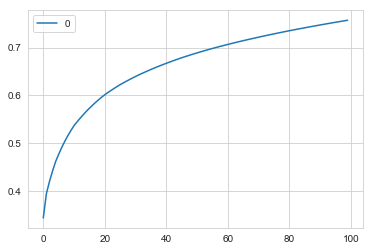

In [92]:
# Checking the number of components that help explain the variability in our data
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
cum_var_exp_df = pd.DataFrame(cum_var_exp)
cum_var_exp_df[:100].plot()

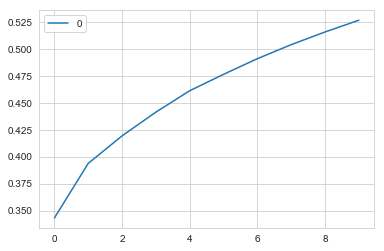

In [93]:
cum_var_exp_df[:10].plot() 

    The first 8 components help explain ~50% of the variability in our data, I want to find out more about these categories

In [143]:
# Create a function to take in a PCA component dataframe and graph out its components 
# and check the top and bottom features of that component
def plotting_components(components, num_components, num_of_elements ):
    fig, ax = plt.subplots(nrows=num_components, ncols=1, figsize = (12, num_components* 8))
    ax = ax.ravel() 
    for i in range(1,num_components+1):
        ax[i-1].barh(
            components[components.index == f'component {i}'].T.sort_values(by= f'component {i}').head(num_of_elements).sort_values(by= f'component {i}').index,
            components[components.index == f'component {i}'].T.sort_values(by= f'component {i}').head(num_of_elements).sort_values(by= f'component {i}')[f'component {i}'])
        ax[i-1].barh(
             components[components.index == f'component {i}'].T.sort_values(by= f'component {i}', ascending = False).head(num_of_elements).sort_values(by= f'component {i}').index,
             components[components.index == f'component {i}'].T.sort_values(by= f'component {i}', ascending = False).head(num_of_elements).sort_values(by= f'component {i}')[f'component {i}'])
        ax[i-1].set_title(f'Component {i}')








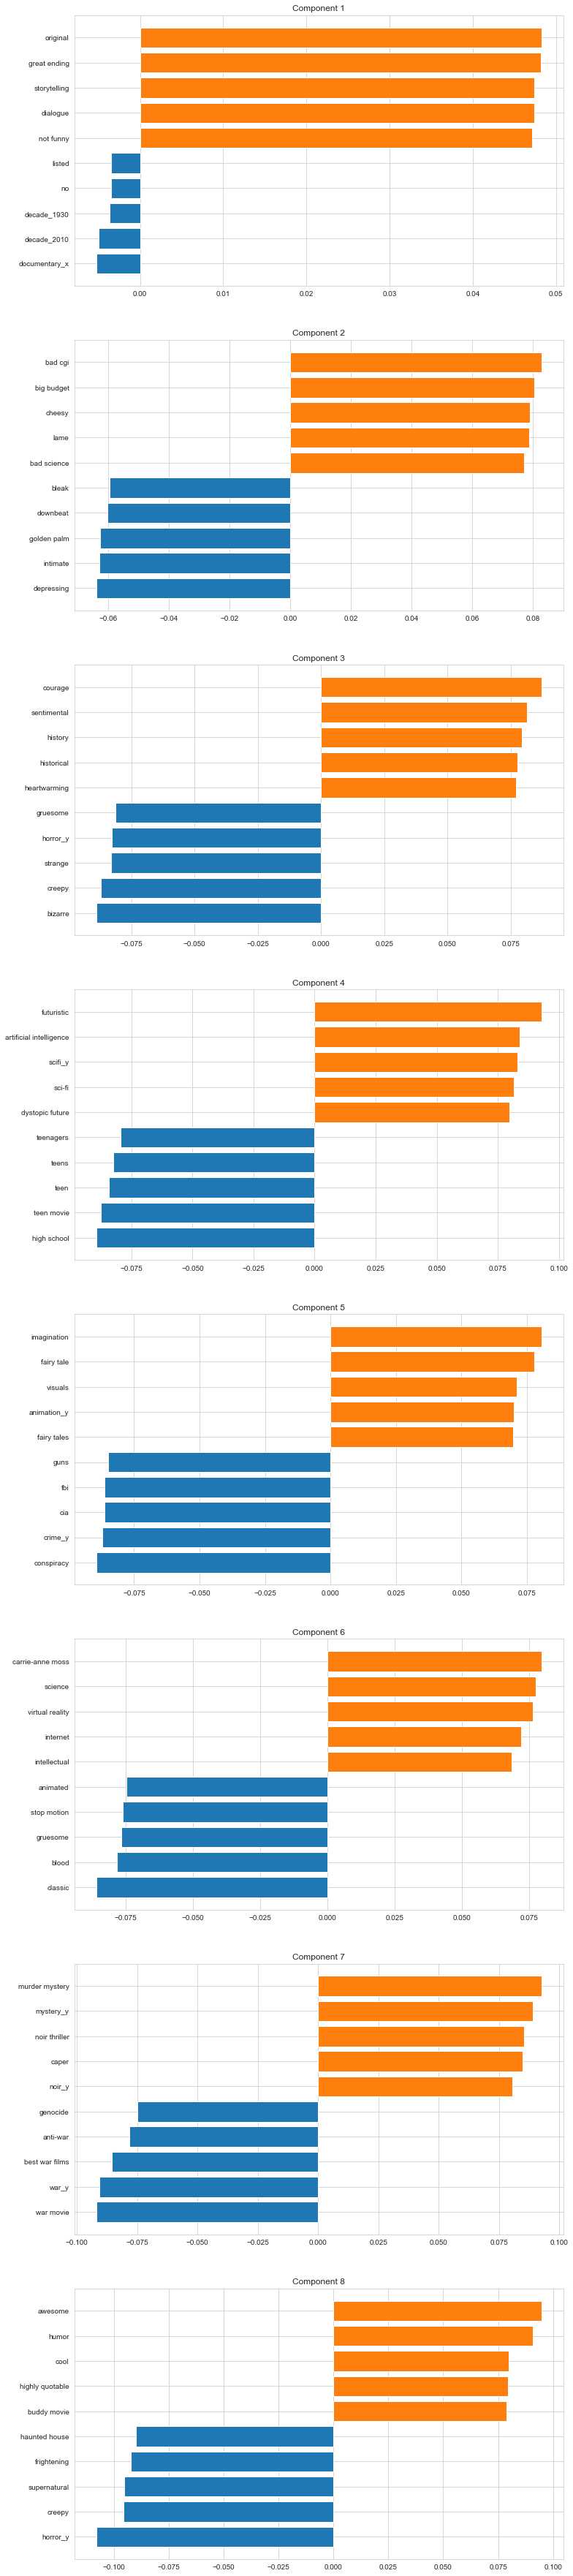

In [144]:
# Graphing top 5 and bottom 5 strongest features of top 8 components 
plotting_components(components, 8, 5)